In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re



In [1]:
import tensorflow as tf

tf.__version__

'2.18.0'

In [2]:
train = pd.read_table ('train.txt', delimiter=';', header=None)
val = pd.read_table ('val.txt', delimiter=';', header=None)
test = pd.read_table ('train.txt', delimiter=';', header=None)

In [3]:
df = pd.concat ([train, test, val])
df.columns = ['text', 'label']
df.reset_index(drop=True)
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df['label'].value_counts()

label
joy         11428
sadness      9882
anger        4593
fear         4086
love         2786
surprise     1225
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

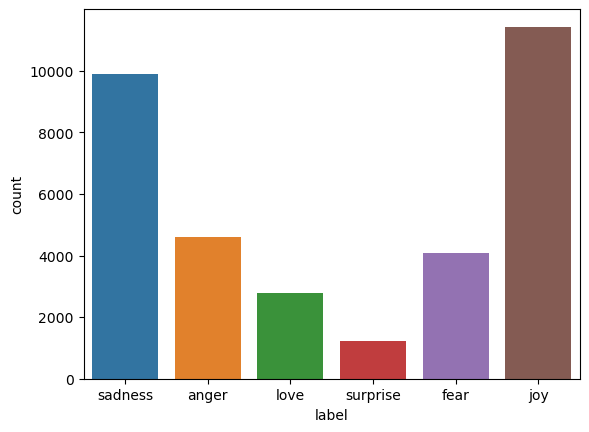

In [5]:
sns.countplot (x='label', data=df)

In [6]:
df.isna().any(axis=1).sum()

0

In [7]:
tt = df['text'].iloc[1]
tt

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [8]:
ps = PorterStemmer()
review = re.sub('[^a-zA-Z]', ' ', tt) #Remove all puntuations leave only characters.
review = review.lower()
review = review.split()
review


['i',
 'can',
 'go',
 'from',
 'feeling',
 'so',
 'hopeless',
 'to',
 'so',
 'damned',
 'hopeful',
 'just',
 'from',
 'being',
 'around',
 'someone',
 'who',
 'cares',
 'and',
 'is',
 'awake']

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
print(stopwords.words('english')[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [11]:
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review

['go', 'feel', 'hopeless', 'damn', 'hope', 'around', 'someon', 'care', 'awak']

### Defining the function for preprocessing

In [12]:
ps = PorterStemmer()

def preprocess (line):
    review = re.sub('[^a-zA-Z]', ' ', line) #Remove all puntuations leave only characters.
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    return ' '.join(review)

In [13]:
df['features'] = df['text'].apply (lambda x: preprocess(x))
df

,text,label,features
0,i didnt feel humiliated,sadness,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,feel grouchi
...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,im ssa examin tomorrow morn im quit well prepa...
1996,i constantly worry about their fight against n...,joy,constantli worri fight natur push limit inner ...
1997,i feel its important to share this info for th...,joy,feel import share info experi thing
1998,i truly feel that if you are passionate enough...,joy,truli feel passion enough someth stay true suc...


In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['N_label'] = label_encoder.fit_transform(df['label'])

In [15]:
df

,text,label,features,N_label
0,i didnt feel humiliated,sadness,didnt feel humili,4
1,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hope around someon care ...,4
2,im grabbing a minute to post i feel greedy wrong,anger,im grab minut post feel greedi wrong,0
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalg fireplac know still properti,3
4,i am feeling grouchy,anger,feel grouchi,0
...,...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,im ssa examin tomorrow morn im quit well prepa...,4
1996,i constantly worry about their fight against n...,joy,constantli worri fight natur push limit inner ...,2
1997,i feel its important to share this info for th...,joy,feel import share info experi thing,2
1998,i truly feel that if you are passionate enough...,joy,truli feel passion enough someth stay true suc...,2


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer (max_features=5000, ngram_range=(1,3))

data_cv = cv.fit_transform(df['features']).toarray()
data_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
import joblib
joblib.dump (cv, 'Text_Count_Vectorizer.pkl')

['Text_Count_Vectorizer.pkl']

In [20]:
data_cv.shape

(34000, 5000)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (data_cv, df['N_label'], test_size=0.25, random_state=42)

In [22]:
y_train.shape

(25500,)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [24]:
model = Sequential ()
model.add (Dense(128, input_shape=(data_cv.shape[1],), activation='relu'))
model.add (Dense(64, activation='relu'))
model.add (Dense(32, activation='relu'))
model.add (Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\Felix\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 650,662 (2.48 MB)

 Trainable params: 650,662 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit (x_train, y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.3917 - loss: 1.6447 - val_accuracy: 0.6286 - val_loss: 0.9009
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7839 - loss: 0.6177 - val_accuracy: 0.9162 - val_loss: 0.2468
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9619 - loss: 0.1274 - val_accuracy: 0.9459 - val_loss: 0.1702
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9840 - loss: 0.0586 - val_accuracy: 0.9549 - val_loss: 0.1560
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9907 - loss: 0.0351 - val_accuracy: 0.9567 - val_loss: 0.1562
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9934 - loss: 0.0235 - val_accuracy: 0.9586 - val_loss: 0.1630
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9956 - loss: 0.0177 - val_accuracy: 0.9576 - val_loss: 0.1690
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9958 - loss: 0.0160 - val_accuracy: 0.9575 - 

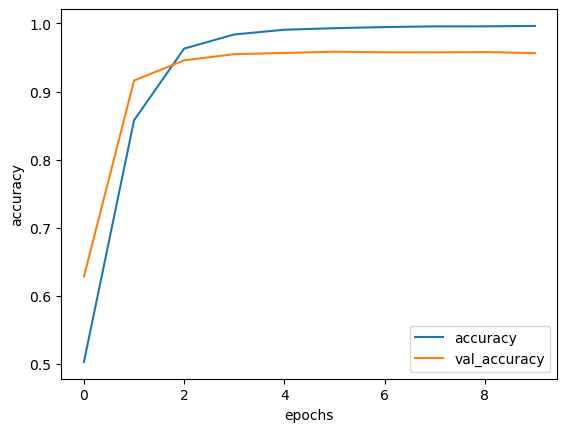

In [28]:
epochs = list(range(10))

acc = history.history ['accuracy']
val_acc = history.history ['val_accuracy']
loss = history.history ['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc, label='accuracy')
plt.plot (epochs, val_acc, label='val_accuracy')
plt.xlabel ('epochs')
plt.ylabel ('accuracy')
plt.legend()
plt.show()


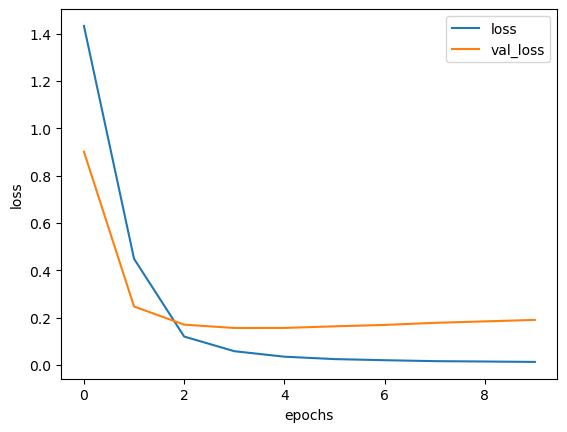

In [29]:
plt.plot (epochs, loss, label='loss')
plt.plot (epochs, val_loss, label='val_loss')
plt.xlabel ('epochs')
plt.ylabel ('loss')
plt.legend()
plt.show()

In [30]:
loss, accuracy = model.evaluate (x_test, y_test, verbose=1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9540 - loss: 0.2057


In [31]:
accuracy

0.9564706087112427

In [32]:
loss

0.19014397263526917

In [33]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)

y_pred

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.3536023e-04, 3.1496404e-04, 9.7695333e-01, 1.7793091e-02,
        1.8000082e-06, 4.8014121e-03],
       [1.7884821e-03, 1.7742086e-02, 4.0001632e-03, 1.6203753e-04,
        6.5155560e-04, 9.7565573e-01],
       [2.0200676e-05, 1.0788497e-05, 7.6743898e-05, 9.9988639e-01,
        3.9199281e-06, 1.9598585e-06],
       ...,
       [2.6296512e-08, 1.2292107e-08, 9.9999356e-01, 6.2194090e-06,
        1.7771912e-08, 2.3641778e-07],
       [1.7414284e-05, 9.9324787e-01, 2.1110005e-05, 7.5894627e-06,
        2.5501792e-04, 6.4510149e-03],
       [1.6646867e-07, 1.9188717e-05, 2.6122261e-06, 9.9997592e-01,
        3.3789116e-10, 2.1099929e-06]], dtype=float32)

In [34]:
y_predd = [np.argmax(y_pred[x]) for x in range (0, len(y_pred))]
print(y_predd)

[2, 5, 3, 4, 2, 4, 2, 4, 4, 4, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 4, 2, 4, 4, 0, 2, 4, 4, 2, 0, 3, 4, 3, 0, 0, 2, 2, 5, 2, 4, 4, 2, 2, 4, 2, 3, 4, 4, 2, 4, 2, 1, 1, 1, 4, 1, 3, 1, 0, 2, 2, 4, 2, 1, 2, 1, 2, 0, 4, 2, 4, 2, 2, 2, 2, 4, 1, 4, 0, 2, 4, 3, 4, 2, 1, 0, 0, 4, 4, 2, 4, 2, 0, 4, 4, 2, 3, 2, 2, 2, 0, 0, 5, 4, 4, 4, 2, 5, 0, 4, 2, 0, 2, 4, 2, 2, 4, 4, 4, 4, 3, 0, 3, 5, 4, 2, 0, 2, 0, 2, 1, 0, 1, 4, 1, 2, 5, 2, 2, 4, 3, 4, 2, 3, 4, 2, 1, 4, 2, 0, 1, 4, 0, 4, 2, 3, 4, 2, 2, 4, 0, 1, 2, 4, 4, 4, 0, 0, 2, 4, 4, 0, 4, 2, 3, 1, 2, 0, 4, 4, 4, 0, 2, 2, 2, 2, 1, 4, 4, 2, 2, 1, 0, 1, 0, 0, 4, 2, 0, 3, 4, 0, 1, 4, 4, 4, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 4, 3, 2, 2, 1, 2, 4, 4, 4, 3, 0, 2, 4, 2, 4, 4, 0, 2, 1, 2, 1, 2, 2, 4, 4, 4, 0, 4, 2, 4, 0, 2, 4, 2, 2, 2, 0, 3, 4, 1, 2, 3, 4, 1, 4, 4, 3, 4, 4, 2, 2, 2, 2, 4, 1, 4, 5, 2, 0, 2, 4, 4, 2, 4, 2, 2, 3, 0, 1, 0, 4, 0, 2, 0, 5, 2, 0, 2, 1, 4, 2, 0, 2, 2, 2, 2, 4, 2, 1, 2, 4, 2, 2, 0, 3, 3, 2, 2, 2, 2, 3, 2, 4, 2, 5, 2, 0, 1, 0, 2, 5, 2, 3, 0, 2, 

In [35]:
accuracy = accuracy_score (y_test, y_predd)

In [36]:
accuracy

0.9564705882352941

In [37]:
y_test

7850     3
15215    5
1331     3
7326     4
10994    2
        ..
5196     4
383      2
12350    2
15534    1
13449    3
Name: N_label, Length: 8500, dtype: int32

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix (y_test, y_predd)

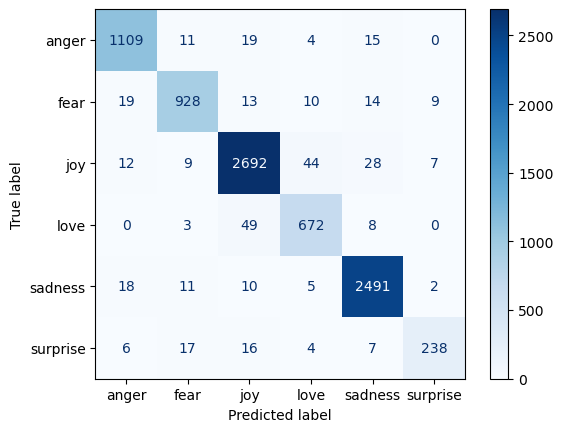

In [39]:
class_names = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [40]:
new_text = "this looks so good. i look forward to more. and i will get bit by God's grace"
ttt = preprocess(new_text)

new_cv = cv.transform([ttt]).toarray()
new_cv.shape

(1, 5000)

In [41]:
now_pred = model.predict(new_cv)
now_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[1.8761428e-05, 3.3098116e-04, 9.9935693e-01, 8.1062271e-06,
        8.8276414e-05, 1.9703206e-04]], dtype=float32)

In [42]:
np.argmax(now_pred)

2

In [43]:
model.save('Text_Emotion.h5')